In [ ]:
import numpy as np
import pandas as pd
import cv2, random, os
from PIL import Image

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EXTRACTING DATA FROM DATASET

In [ ]:

import zipfile
zip_ref=zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/TBX11K.zip")
zip_ref.extractall()
zip_ref.close()

# **VISUALIZATION**

In [ ]:
#visualize data

'''function'''

#get subdirectories
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#visualize visualize visualize
import random

def visualize4(target_dir):
  plt.figure(figsize=(7,7))
  for i in range(4):
    target_class=os.listdir(target_dir)
    #target_folder=target_dir+target_class
    random_img=random.sample(target_class,1)
    print(random_img)
    img_array=mpimg.imread(target_dir+"/"+random_img[0]) #Read an image from a file into an array.
    ax=plt.subplot(2,2,i+1)
    plt.imshow(img_array,cmap=plt.cm.binary)
    plt.axis("off")
    #plt.title("tb")


    #print(f"image shape {img_array.shape}")
    #return img_array
    #print(img_array)

  #to plot
  ''' 1) Convert image in numerical format to 2d array using matplotlib.image
      2)Plot with .imshow() as it takes array as input'''


 # plt.figure()
  #plt.imshow(img_array)
  ##plt.axis("off")
  #plt.title(target_class)
  #print(f"image shape {img_array.shape}")
  #return img_array
  #print(img_array)














In [ ]:
train_dir="/content/TBX11K/imgs/tb"

import numpy as np
import random
import os
r=random.sample(os.listdir(train_dir),1)
r

['tb0142.png']

['tb0505.png']
['tb1078.png']
['tb0271.png']
['tb0879.png']


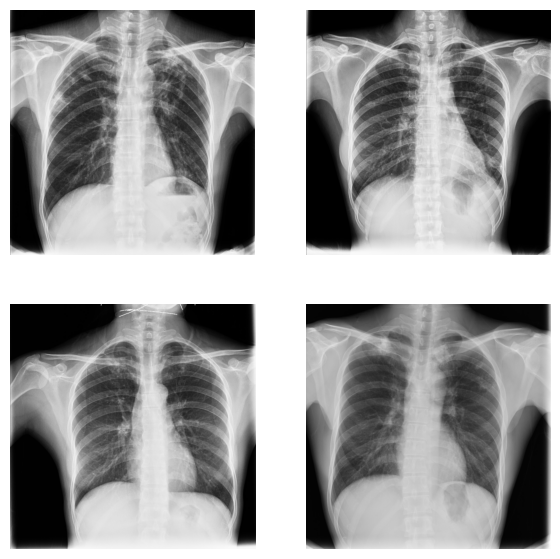

In [ ]:



visualize4(train_dir)


HEALTHY

['h3173.png']
['h4969.png']
['h1186.png']
['h1185.png']


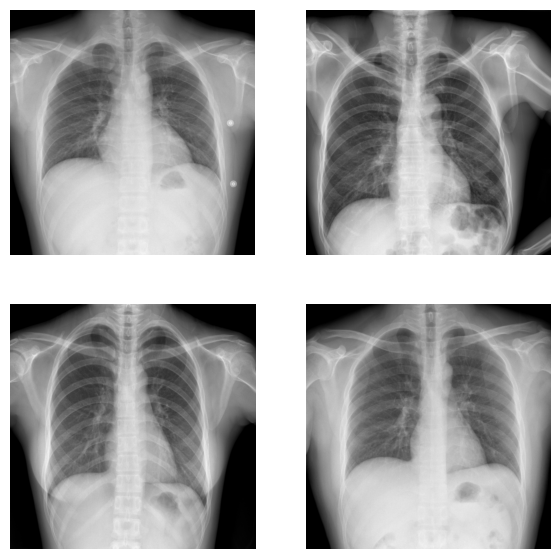

In [ ]:
healthy_dir="/content/TBX11K/imgs/health"

visualize4(healthy_dir)

['s1452.png']
['s3854.png']
['s2620.png']
['s4307.png']


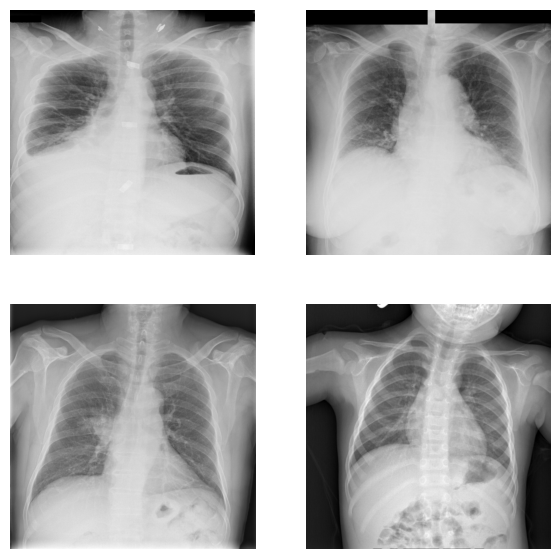

In [ ]:
sick_dir="/content/TBX11K/imgs/sick"
visualize4(sick_dir)

In [ ]:
s0329.png



NameError: ignored

#PREPROCESSING DATA

In [ ]:
import os
#os.listdir('/content/output/train/health')
!cd output/train/health; ls -1 | wc -l
!cd output/train/sick; ls -1 | wc -l
!cd output/train/tb; ls -1 | wc -l


/bin/bash: line 1: cd: output/train/health: No such file or directory
3
/bin/bash: line 1: cd: output/train/sick: No such file or directory
3
/bin/bash: line 1: cd: output/train/tb: No such file or directory
3


In [ ]:
!pip install split-folders[full]



In [ ]:
import splitfolders
splitfolders.ratio('/content/TBX11K/imgs', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 11702 files [00:45, 257.21 files/s]


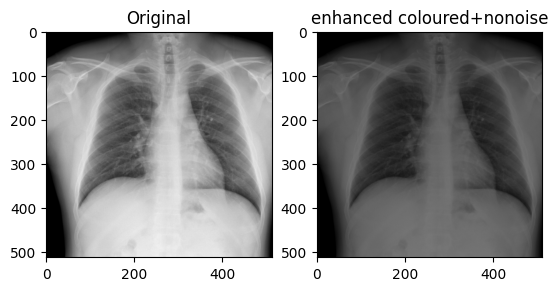

In [ ]:

#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/output/train/health/h0003.png')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Convert the image from BGR to HSV color space
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Adjust the hue, saturation, and value of the image
# Adjusts the hue by multiplying it by 0.7
image[:, :, 0] = image[:, :, 0] * 0.7
# Adjusts the saturation by multiplying it by 1.5
image[:, :, 1] = image[:, :, 1] * 1.5
# Adjusts the value by multiplying it by 0.5
image[:, :, 2] = image[:, :, 2] * 0.5

# Convert the image back to BGR color space
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
filtered_image = cv2.medianBlur(image2, 11)


#Save the image
cv2.imwrite('enhanced coloured+nonoise.jpg', image2)

#Plot the enhanced image
plt.subplot(1, 2, 2)
plt.title("enhanced coloured+nonoise")
plt.imshow(image2)
plt.show()

BCET

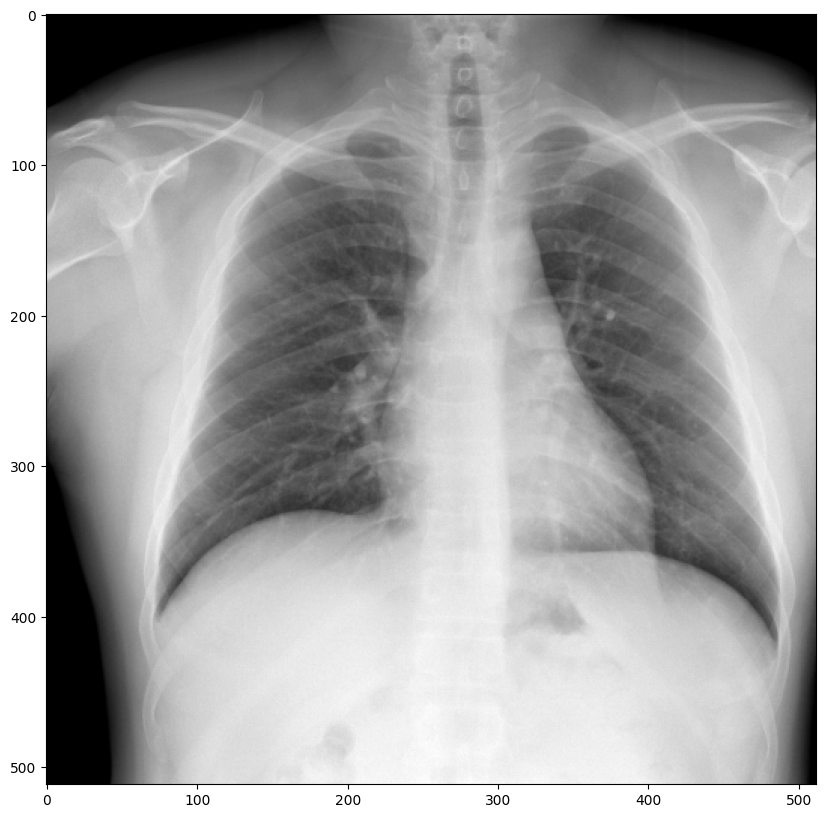

In [ ]:
from matplotlib import pyplot as plt

# Reading the input image
img=cv2.imread('/content/output/train/health/h0003.png')
# Converting to gray scale image from 3 channels to single channel
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray_img,cmap="gray")

<ipython-input-15-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


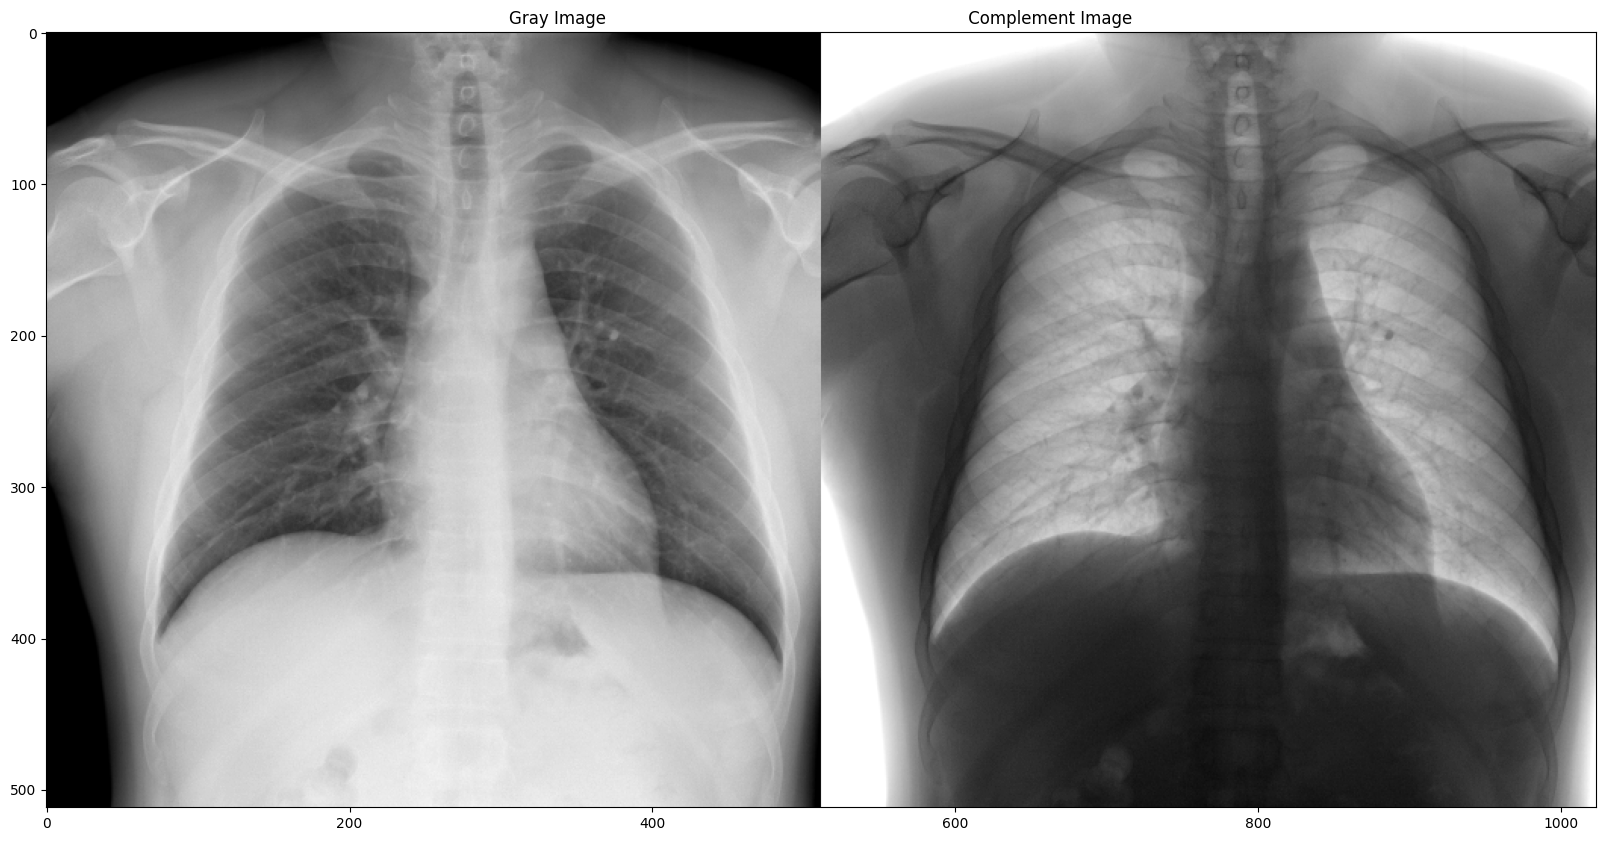

In [ ]:


bcet_img = bcet(gray_img)
plt.figure(figsize=(20,20))
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Converting to gray scale image from 3 channels to single channel

'''image complement technique'''

image_complement = cv2.bitwise_not(gray_img)

#gray_img = gray_img/255.0
#im_power_law_transformation = cv2.pow(gray_img, 0.6)

#plt.imshow(np.hstack((target, im_power_law_transformation)),cmap='gray')
plt.imshow(np.hstack((gray_img, image_complement)),cmap='gray')

plt.title('Gray Image                                                                     Complement Image')
plt.show()

<ipython-input-15-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


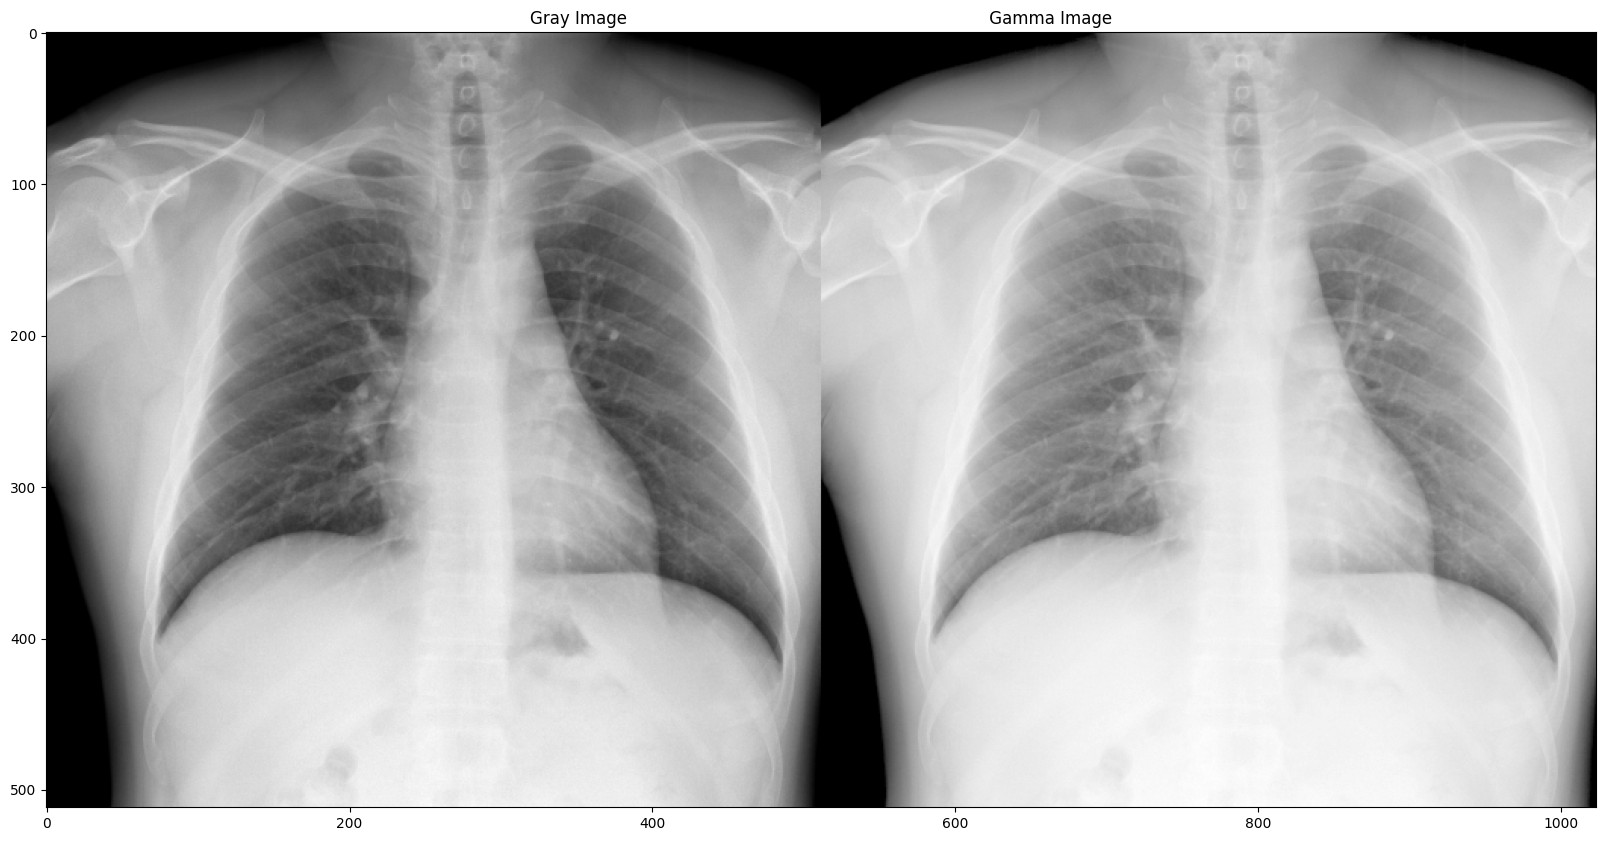

In [ ]:

#THE BEST


bcet_img = bcet(gray_img)
plt.figure(figsize=(20,20))
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Converting to gray scale image from 3 channels to single channel

'''gamma correction'''


gray_img = gray_img/255.0
im_power_law_transformation = cv2.pow(gray_img, 0.6)
plt.imshow(np.hstack((gray_img*255, im_power_law_transformation*255)),cmap='gray')


plt.title('Gray Image                                                                     Gamma Image')
plt.show()

BCET

In [ ]:
def bcet(img):
    Lmin = np.min(img) # MINIMUM OF INPUT IMAGE
    Lmax = np.max(img) # MAXIMUM OF INPUT IMAGE
    Lmean = np.mean(img) #MEAN OF INPUT IMAGE
    LMssum = np.mean(img * img) #MEAN SQUARE SUM OF INPUT IMAGE

    Gmin = 0 #MINIMUM OF OUTPUT IMAGE
    Gmax = 255 #MAXIMUM OF OUTPUT IMAGE
    Gmean = 110 #MEAN OF OUTPUT IMAGE

    bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)
    bden = 2*(Lmax*(Gmean-Gmin)-Lmean*(Gmax-Gmin)+Lmin*(Gmax-Gmean))

    b = bnum/bden

    a = (Gmax-Gmin)/((Lmax-Lmin)*(Lmax+Lmin-2*b))

    c = Gmin - a*(Lmin-b) * (Lmin-b)

    y = a*(img-b) * (img-b) +c #PARABOLIC FUNCTION
    y = np.array(y, dtype=np.uint8)

    return y

<ipython-input-16-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


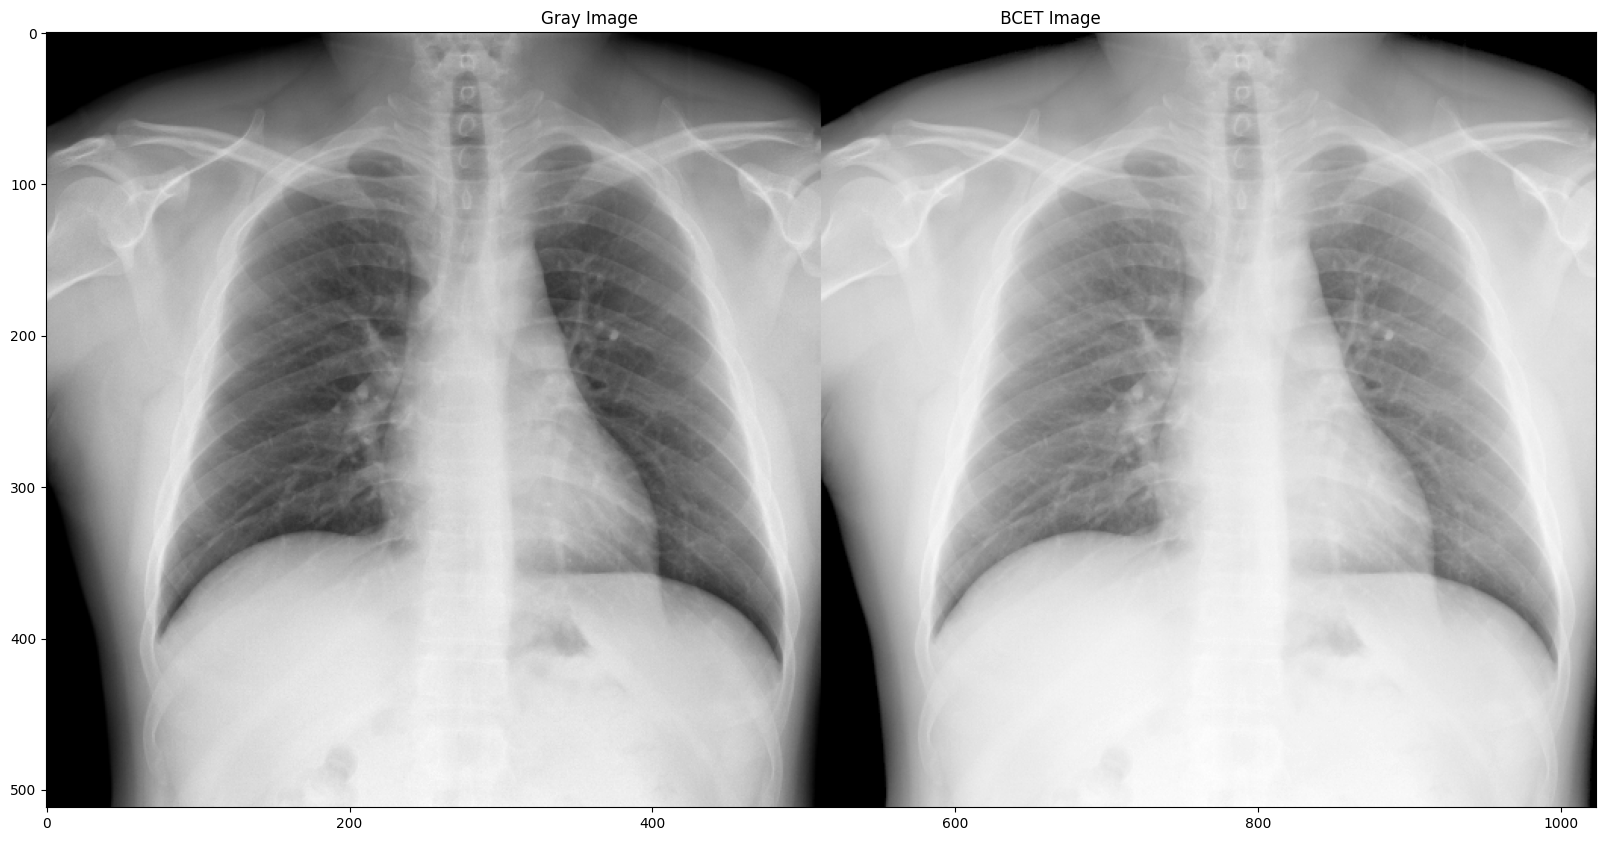

In [ ]:
original=cv2.imread('/content/output/train/health/h0003.png')

gray_img = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)

bcet_img = bcet(gray_img)
plt.figure(figsize=(20,20))
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Converting to gray scale image from 3 channels to single channel

'''gamma correction'''


gray_img = gray_img/255.0
im_power_law_transformation = cv2.pow(gray_img, 0.6)
plt.imshow(np.hstack((gray_img, im_power_law_transformation)),cmap='gray')
plt.title('Gray Image                                                                     BCET Image')
plt.show()

In [ ]:

import splitfolders
splitfolders.ratio('/content/TBX11K/imgs', output="bcet", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 11702 files [00:48, 243.53 files/s]


In [151]:
#splitting validation data
import splitfolders
splitfolders.ratio('/content/valbcet', output="pre_val_bcet", seed=1337, ratio=(.8, 0.15,0.05))


Copying files: 840 files [00:00, 2145.41 files/s]


In [ ]:
import splitfolders
splitfolders.ratio('/content/TBX11K/imgs', output="gamma-correction", seed=1337, ratio=(.8, 0.1,0.1))

In [ ]:

import splitfolders
splitfolders.ratio('/content/TBX11K/imgs', output="gamma+bcet", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 11702 files [00:46, 253.01 files/s]


In [ ]:
!mkdir "/content/outbcet"

In [ ]:
!cd outbcet
!mkdir health

In [ ]:
import cv2 #read images
import glob
from skimage.filters import gaussian
from skimage import img_as_ubyte

In [ ]:
!mkdir outbcet

mkdir: cannot create directory ‘outbcet’: File exists


In [ ]:
!cd outbcet ; mkdir health

In [ ]:
!cd outbcet; mkdir health

mkdir: cannot create directory ‘health’: File exists


In [ ]:

!cd outbcet; mkdir sick

In [ ]:
!cd outbcet; mkdir tb

In [ ]:
!mkdir valbcet

In [ ]:
!cd valbcet; mkdir health sick tb

In [ ]:
!cd waste ; mkdir trial2
#val bcet 112
#/content/valbcet/sick/val_bcet_sick_image100.png
#/content/valbcet/sick/val_bcet_sick_image204.png
#/content/valbcet/tb/val_bcet_tb_image25.png

/bin/bash: line 1: cd: waste: No such file or directory


INCREASING BCET TRAINING DATA

In [ ]:
!cp -r  /content/waste/trial2/*   /content/TBX11K/imgs/extra/da+db/train/

In [ ]:
!cp -i -r /content/TBX11K/imgs/extra/mc+shenzhen/train/*  /content/waste/trial2/

In [ ]:
#mv -v

In [ ]:
!cp -i -r /content/pre_val_bcet/train/sick/* /content/outbcet/sick

In [ ]:
!cp -i -r /content/pre_val_bcet/train/tb/* /content/outbcet/tb

In [ ]:
!cp -i -r /content/pre_val_bcet/train/health/* /content/outbcet/health

In [ ]:
path='/content/bcet/train/health/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,1)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  cv2.imwrite('/content/outbcet/health/bcet_image'+str(img_number)+".png",bcet_image)
  img_number+=1


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
<ipython-input-15-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


In [ ]:
path='/content/output/val/health/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,1)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  cv2.imwrite('/content/valbcet/health/val_bcet_image'+str(img_number)+".png",bcet_image)
  img_number+=1


<ipython-input-15-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


In [ ]:
path='/content/bcet/train/sick/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,1)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  cv2.imwrite('/content/outbcet/sick/bcet_sick_image'+str(img_number)+".png",bcet_image)
  img_number+=1


<ipython-input-15-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)
<ipython-input-15-60b7afc909b3>:16: RuntimeWarning: overflow encountered in ubyte_scalars
  a = (Gmax-Gmin)/((Lmax-Lmin)*(Lmax+Lmin-2*b))


In [ ]:
path='/content/output/val/sick/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,1)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  cv2.imwrite('/content/valbcet/sick/val_bcet_sick_image'+str(img_number)+".png",bcet_image)
  img_number+=1


<ipython-input-15-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


In [ ]:
path='/content/bcet/train/tb/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,1)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  cv2.imwrite('/content/outbcet/tb/bcet_tb_image'+str(img_number)+".png",bcet_image)
  img_number+=1


<ipython-input-15-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


In [ ]:
path='/content/output/val/tb/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,1)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  cv2.imwrite('/content/valbcet/tb/val_bcet_tb_image'+str(img_number)+".png",bcet_image)
  img_number+=1


<ipython-input-15-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


# FURTHER PREPROCESSING

In [ ]:
!mkdir waste

In [ ]:
!cp -r '/content/TBX11K/imgs/extra' '/content/waste'

In [ ]:
!mkdir outputgamma

In [ ]:
!cd outputgamma ; mkdir health; mkdir sick; mkdir tb

In [ ]:
!cd outputgamma ; rm -r health

In [ ]:
!cd outputgamma; mkdir health

In [ ]:
!mkdir valgamma

healthy

mkdir: cannot create directory ‘sick’: File exists
mkdir: cannot create directory ‘tb’: File exists


In [ ]:
path='/content/gamma-correction/train/health/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  #bcet_image=bcet(smoothed_img)
  smoothed_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(smoothed_img, 0.6)
  cv2.imwrite('/content/outputgamma/health/gamma_correction_health_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1


In [ ]:
path='/content/output/val/health/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  #bcet_image=bcet(smoothed_img)
  smoothed_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(smoothed_img, 0.6)
  cv2.imwrite('/content/valgamma/health/gamma_correction_val_health_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1


sick images

In [ ]:
path='/content/gamma-correction/train/sick/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  #bcet_image=bcet(smoothed_img)
  smoothed_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(smoothed_img, 0.6)
  cv2.imwrite('/content/outputgamma/sick/gamma_correction_sick_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1


In [ ]:
path='/content/output/val/sick/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  #bcet_image=bcet(smoothed_img)
  smoothed_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(smoothed_img, 0.6)
  cv2.imwrite('/content/valgamma/sick/gamma_correction_val_sick_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1


tb images


In [ ]:
path='/content/gamma-correction/train/tb/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  #bcet_image=bcet(smoothed_img)
  smoothed_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(smoothed_img, 0.6)
  cv2.imwrite('/content/outputgamma/tb/gamma_correction_tb_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1


In [ ]:
path='/content/output/val/tb/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  #bcet_image=bcet(smoothed_img)
  smoothed_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(smoothed_img, 0.6)
  cv2.imwrite('/content/valgamma/tb/gamma_correction_val_tb_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1


# Gamma + bcet

In [ ]:
!mkdir output_gamma+bcet; cd output_gamma+bcet; mkdir health; mkdir sick; mkdir tb

In [ ]:
path='/content/gamma+bcet/train/health/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  bcet_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(bcet_img, 0.6)
  cv2.imwrite('/content/output_gamma+bcet/health/gamma+bcet_health_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1


<ipython-input-7-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


In [ ]:
path='/content/gamma+bcet/train/sick/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  bcet_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(bcet_img, 0.6)
  cv2.imwrite('/content/output_gamma+bcet/sick/gamma+bcet_sick_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1



<ipython-input-7-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)
<ipython-input-7-60b7afc909b3>:16: RuntimeWarning: overflow encountered in ubyte_scalars
  a = (Gmax-Gmin)/((Lmax-Lmin)*(Lmax+Lmin-2*b))


In [ ]:
#valid


In [ ]:
path='/content/gamma+bcet/train/tb/*.*'
img_number=1
for file in glob.glob(path):
  img=cv2.imread(file,0)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  bcet_img = smoothed_img/255.0
  im_power_law_transformation = cv2.pow(bcet_img, 0.6)
  cv2.imwrite('/content/output_gamma+bcet/tb/gamma+bcet_health_image'+str(img_number)+".png",im_power_law_transformation)
  img_number+=1


<ipython-input-7-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


# MORE VISUALIZATION

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


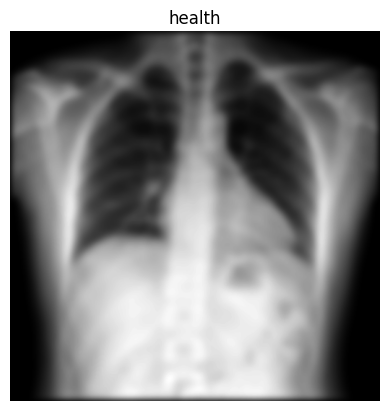

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/outbcet/",
                        target_class="health")

In [ ]:
img.shape

(512, 512)

In [ ]:
!cd output/val; rm -r extra;rm -r test

# PREPROCESSING

In [ ]:
#data augmentation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  preprocessing.Rescaling(1./255)
], name ="data_augmentation")

In [ ]:
# Define training and test directory paths
train_dir = "/content/outbcet/"
valid_bcet_dir="/content/valbcet"
#valid_bcet_dir='/content/pre_val_bcet/val'
#valid_bcet_dir="/content/newvalbcet"


In [ ]:
import tensorflow as tf

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen= ImageDataGenerator(rescale=1./255)


In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='sparse',
                                               batch_size=32,
                                               seed=42)
valid_bcet_data = valid_datagen.flow_from_directory(valid_bcet_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)

Found 6720 images belonging to 3 classes.
Found 840 images belonging to 3 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
labels[:10], images[0].shape


(array([1., 1., 0., 0., 0., 1., 0., 1., 1., 2.], dtype=float32), (224, 224, 3))

In [ ]:
len(train_data)

210

gamma_correction

In [ ]:
# Define training and test directory paths
gamma_train_dir = "/content/outputgamma"
valid_gamma_dir= "/content/valgamma"


In [ ]:
outputgammatrain_data = train_datagen.flow_from_directory(directory=gamma_train_dir,
                                               target_size=(224, 224),
                                               class_mode='sparse',
                                               batch_size=32,
                                               seed=42
                                            )

valid_gamma_data = valid_datagen.flow_from_directory(valid_gamma_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)

Found 6720 images belonging to 3 classes.
Found 840 images belonging to 3 classes.


outputgamma+bcet

In [ ]:
gamma_plus_bcet_traindir='/content/output_gamma+bcet'


In [ ]:
outputgamma_bcet_train_data = train_datagen.flow_from_directory(directory=gamma_plus_bcet_traindir,
                                               target_size=(224, 224),
                                               class_mode='sparse',
                                               batch_size=32,
                                               seed=42                 )
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)

Found 6720 images belonging to 3 classes.
Found 840 images belonging to 3 classes.


In [ ]:
outputgamma_bcet_train_data = train_datagen.flow_from_directory(directory=gamma_bcet_traindir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=32)

NameError: ignored

In [ ]:
train_data
outputgammatrain_data
outputgamma_bcet_train_data
valid_data


In [ ]:
!mkdir newvalbcet

In [ ]:
!cp -r /content/pre_val_bcet/val/ newvalbcet

# VGG MODEL

# CREATE A MODEL ->TRANSFER LEARNING FEATURE EXTRACTION

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(3)(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
 softmax_float32 (Activatio  (None, 3)                 0         
 n)                                                              
                                                             

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

**ONLY BCET**

In [ ]:
history_model1_bcet =model.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_data,
                          validation_steps=int(0.15 * len(valid_data)))

Epoch 1/5
210/210 [==============================] - 35s 166ms/step - loss: 0.9425 - accuracy: 0.4783 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
210/210 [==============================] - 34s 160ms/step - loss: 0.9463 - accuracy: 0.4607 - val_loss: nan - val_accuracy: 0.3313
Epoch 3/5
210/210 [==============================] - 35s 169ms/step - loss: 0.9399 - accuracy: 0.4917 - val_loss: nan - val_accuracy: 0.2875
Epoch 4/5
210/210 [==============================] - 34s 163ms/step - loss: 0.9414 - accuracy: 0.4881 - val_loss: nan - val_accuracy: 0.3438
Epoch 5/5
210/210 [==============================] - 34s 162ms/step - loss: 0.9444 - accuracy: 0.4786 - val_loss: nan - val_accuracy: 0.0000e+00


**ONLY GAMMA CORRECTION**

In [ ]:
history_gamma_correction=model.fit(outputgammatrain_data,
                                   epochs=5,
                                   steps_per_epoch=len(train_data),
                                   validation_data=valid_data,
                                   validation_steps=int(0.15 * len(valid_data)
                                   ))

Epoch 1/5
210/210 [==============================] - 28s 132ms/step - loss: 0.9489 - accuracy: 0.4548 - val_loss: nan - val_accuracy: 0.3688
Epoch 2/5
210/210 [==============================] - 35s 164ms/step - loss: 0.9513 - accuracy: 0.4500 - val_loss: nan - val_accuracy: 0.3500
Epoch 3/5
210/210 [==============================] - 27s 130ms/step - loss: 0.9516 - accuracy: 0.4506 - val_loss: nan - val_accuracy: 0.3063
Epoch 4/5
210/210 [==============================] - 24s 112ms/step - loss: 0.9490 - accuracy: 0.4463 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
210/210 [==============================] - 25s 119ms/step - loss: 0.9551 - accuracy: 0.4601 - val_loss: nan - val_accuracy: 0.0000e+00


**GAMMA CORRECTION + BCET**

In [ ]:
history_gamma_bcet_correction=model.fit(outputgamma_bcet_train_data,
                                   epochs=5,
                                   steps_per_epoch=len(train_data),
                                   validation_data=valid_data,
                                   validation_steps=int(0.15 * len(valid_data)
                                   ))

Epoch 1/5
210/210 [==============================] - 44s 128ms/step - loss: 0.9513 - accuracy: 0.4512 - val_loss: nan - val_accuracy: 0.3688
Epoch 2/5
210/210 [==============================] - 23s 111ms/step - loss: 0.9551 - accuracy: 0.4454 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
210/210 [==============================] - 25s 118ms/step - loss: 0.9480 - accuracy: 0.4577 - val_loss: nan - val_accuracy: 0.2875
Epoch 4/5
210/210 [==============================] - 25s 116ms/step - loss: 0.9530 - accuracy: 0.4481 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
210/210 [==============================] - 25s 117ms/step - loss: 0.9481 - accuracy: 0.4493 - val_loss: nan - val_accuracy: 0.3000


# FINE TUNING TRANSFER LEARNING

# XCEPTION MODEL

In [ ]:
def entry_flow(inputs):

  x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(64, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  previous_block_activation = x  # Set aside residual

  # Blocks 1, 2, 3 are identical apart from the feature depth.
  for size in [128, 256, 728]:
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(size, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    residual = layers.Conv2D(  # Project residual
        size, 1, strides=2, padding='same')(previous_block_activation)
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

  return x


def middle_flow(x, num_blocks=8):

  previous_block_activation = x

  for _ in range(num_blocks):
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(728, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(728, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(728, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, previous_block_activation])  # Add back residual
    previous_block_activation = x  # Set aside next residual

  return x


def exit_flow(x, num_classes=3):

  previous_block_activation = x

  x = layers.Activation('relu')(x)
  x = layers.SeparableConv2D(728, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)

  x = layers.Activation('relu')(x)
  x = layers.SeparableConv2D(1024, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)

  x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

  residual = layers.Conv2D(  # Project residual
      1024, 1, strides=2, padding='same')(previous_block_activation)
  x = layers.add([x, residual])  # Add back residual

  x = layers.SeparableConv2D(1536, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.SeparableConv2D(2048, 3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  x = layers.GlobalAveragePooling2D()(x)
  if num_classes == 1:
    activation = 'sigmoid'
  else:
    activation = 'softmax'
  return layers.Dense(num_classes, activation=activation)(x)



# Create Xception by chaining the 3 flows
#inputs = keras.Input(shape=(224, 224, 3))
#outputs = exit_flow(middle_flow(entry_flow(inputs)))
#xception = keras.Model(inputs, outputs)

In [ ]:
input_shape=(224,224,3)

In [ ]:
inputs = layers.Input(shape=input_shape, name="input_layer")

inputs = data_augmentation(inputs)
x=data_augmentation(inputs)


outputs = exit_flow(middle_flow(entry_flow(inputs)))
xception = tf.keras.Model(inputs, outputs)



In [ ]:
xception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, None, None, 32)       896       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_36 (Ba  (None, None, None, 32)       128       ['conv2d_6[1][0]']            
 tchNormalization)                                                                                
                                                                                                  
 activation_36 (Activation)  (None, None, None, 32)       0         ['batch_normalization_36

In [ ]:
xception.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history_model1 =xception.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_bcet_data,
                          validation_steps=int(0.15 * len(valid_bcet_data)))

Epoch 1/5
210/210 [==============================] - 109s 503ms/step - loss: 0.2266 - accuracy: 0.9254 - val_loss: 2.4283 - val_accuracy: 0.3984
Epoch 2/5
210/210 [==============================] - 105s 498ms/step - loss: 0.1424 - accuracy: 0.9519 - val_loss: 0.1729 - val_accuracy: 0.9375
Epoch 3/5
210/210 [==============================] - 105s 501ms/step - loss: 0.1140 - accuracy: 0.9643 - val_loss: 0.6680 - val_accuracy: 0.8359
Epoch 4/5
210/210 [==============================] - 105s 500ms/step - loss: 0.1017 - accuracy: 0.9644 - val_loss: 1.0160 - val_accuracy: 0.6250
Epoch 5/5
210/210 [==============================] - 105s 500ms/step - loss: 0.0800 - accuracy: 0.9699 - val_loss: 0.1099 - val_accuracy: 0.9609


In [ ]:
print(len(train_data))

231


In [ ]:
history_model1 =xception.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_bcet_data,
                          validation_steps=int(0.15 * len(valid_bcet_data)))

Epoch 1/5
210/210 [==============================] - 146s 492ms/step - loss: 0.3973 - accuracy: 0.8653 - val_loss: 1.3385 - val_accuracy: 0.4453
Epoch 2/5
210/210 [==============================] - 106s 503ms/step - loss: 0.2211 - accuracy: 0.9226 - val_loss: 3.6604 - val_accuracy: 0.4297
Epoch 3/5
210/210 [==============================] - 108s 515ms/step - loss: 0.1600 - accuracy: 0.9439 - val_loss: 0.3201 - val_accuracy: 0.9219
Epoch 4/5
210/210 [==============================] - 107s 509ms/step - loss: 0.1597 - accuracy: 0.9439 - val_loss: 0.1655 - val_accuracy: 0.9531
Epoch 5/5
210/210 [==============================] - 109s 516ms/step - loss: 0.1066 - accuracy: 0.9652 - val_loss: 0.0873 - val_accuracy: 0.9766


In [ ]:
history_model1 =xception.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_bcet_data,
                          validation_steps=int(0.15 * len(valid_bcet_data)))

Epoch 1/5
210/210 [==============================] - 107s 507ms/step - loss: 0.1136 - accuracy: 0.9591 - val_loss: 0.1657 - val_accuracy: 0.9531
Epoch 2/5
210/210 [==============================] - 108s 512ms/step - loss: 0.1097 - accuracy: 0.9629 - val_loss: 0.6192 - val_accuracy: 0.8594
Epoch 3/5
210/210 [==============================] - 107s 506ms/step - loss: 0.0876 - accuracy: 0.9690 - val_loss: 0.1469 - val_accuracy: 0.9453
Epoch 4/5
210/210 [==============================] - 106s 504ms/step - loss: 0.0708 - accuracy: 0.9769 - val_loss: 0.1103 - val_accuracy: 0.9688
Epoch 5/5
210/210 [==============================] - 106s 506ms/step - loss: 0.0634 - accuracy: 0.9768 - val_loss: 0.1690 - val_accuracy: 0.9531


In [ ]:
history_model1 =xception.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_bcet_data,
                          validation_steps=int(0.15 * len(valid_bcet_data)))

Epoch 1/5
210/210 [==============================] - 108s 514ms/step - loss: 0.1102 - accuracy: 0.9616 - val_loss: 0.6486 - val_accuracy: 0.8594
Epoch 2/5
210/210 [==============================] - 103s 490ms/step - loss: 0.0995 - accuracy: 0.9661 - val_loss: 0.3495 - val_accuracy: 0.8828
Epoch 3/5
210/210 [==============================] - 103s 492ms/step - loss: 0.0930 - accuracy: 0.9711 - val_loss: 0.1186 - val_accuracy: 0.9766
Epoch 4/5
210/210 [==============================] - 104s 494ms/step - loss: 0.0653 - accuracy: 0.9787 - val_loss: 0.5186 - val_accuracy: 0.8750
Epoch 5/5
210/210 [==============================] - 104s 493ms/step - loss: 0.0714 - accuracy: 0.9784 - val_loss: 0.1632 - val_accuracy: 0.9609


In [ ]:
 !cd newvalbcet; rm -rf val

In [ ]:
!cd newvalbcet ; mkdir health;mkdir sick; mkdir tb

In [ ]:
!cp -i -r /content/valbcet/health/* /content/newvalbcet/health

In [ ]:
!cp -i -r /content/valbcet/sick/* /content/newvalbcet/sick

In [ ]:
!cp -i -r /content/valbcet/tb/* /content/newvalbcet/tb

In [ ]:
!cd newvalbcet ;mkdir tb

In [ ]:
!cp -i -r  /content/pre_val_bcet/val/sick/* /content/newvalbcet/sick

**ONLY GAMMA CORRECTION**

In [ ]:
history_xception_gamma_correction=xception.fit(outputgammatrain_data,
                                   epochs=5,
                                   steps_per_epoch=len(outputgammatrain_data),
                                   validation_data=valid_gamma_data,
                                   validation_steps=int(0.15 * len(valid_data)
                                   ))

Epoch 1/5
210/210 [==============================] - 155s 503ms/step - loss: 0.4797 - accuracy: 0.8251 - val_loss: 1.1961 - val_accuracy: 0.4453
Epoch 2/5
210/210 [==============================] - 104s 496ms/step - loss: 0.2966 - accuracy: 0.8960 - val_loss: 2.3461 - val_accuracy: 0.4453
Epoch 3/5
210/210 [==============================] - 104s 495ms/step - loss: 0.2466 - accuracy: 0.9161 - val_loss: 1.1913 - val_accuracy: 0.5391
Epoch 4/5
210/210 [==============================] - 104s 496ms/step - loss: 0.2011 - accuracy: 0.9295 - val_loss: 0.7406 - val_accuracy: 0.6953
Epoch 5/5
210/210 [==============================] - 105s 498ms/step - loss: 0.1708 - accuracy: 0.9439 - val_loss: 2.1574 - val_accuracy: 0.1094


**GAMMA+BCET**

In [ ]:
history_xception_bcet_plus_gamma__correction=xception.fit(outputgamma_bcet_train_data,
                                   epochs=7,
                                   steps_per_epoch=len(outputgamma_bcet_train_data),
                                   validation_data=valid_data,
                                   validation_steps=int(0.15 * len(valid_data)
                                   ))

Epoch 1/7
210/210 [==============================] - 235s 565ms/step - loss: 0.4328 - accuracy: 0.8457 - val_loss: 1.1064 - val_accuracy: 0.4375
Epoch 2/7
210/210 [==============================] - 116s 552ms/step - loss: 0.2847 - accuracy: 0.9028 - val_loss: 1.3205 - val_accuracy: 0.2578
Epoch 3/7
210/210 [==============================] - 116s 554ms/step - loss: 0.2364 - accuracy: 0.9195 - val_loss: 88.1863 - val_accuracy: 0.4531
Epoch 4/7
210/210 [==============================] - 115s 550ms/step - loss: 0.1978 - accuracy: 0.9344 - val_loss: 161.0074 - val_accuracy: 0.0781
Epoch 5/7
210/210 [==============================] - 116s 551ms/step - loss: 0.1886 - accuracy: 0.9365 - val_loss: 177.2818 - val_accuracy: 0.1016
Epoch 6/7
210/210 [==============================] - 118s 559ms/step - loss: 0.1518 - accuracy: 0.9493 - val_loss: 305.7159 - val_accuracy: 0.3203
Epoch 7/7
210/210 [==============================] - 116s 551ms/step - loss: 0.1314 - accuracy: 0.9531 - val_loss: 733.1100

In [ ]:
history_xception_bcet_plus_gamma__correction=xception.fit(outputgamma_bcet_train_data,
                                   epochs=20,
                                   steps_per_epoch=len(outputgamma_bcet_train_data),
                                   validation_data=valid_data,
                                   validation_steps=int(0.15 * len(valid_data)
                                   ))

Epoch 1/20
210/210 [==============================] - 116s 554ms/step - loss: 0.0502 - accuracy: 0.9839 - val_loss: 316.0598 - val_accuracy: 0.3438
Epoch 2/20
210/210 [==============================] - 115s 547ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 263.4882 - val_accuracy: 0.5156
Epoch 3/20
210/210 [==============================] - 115s 547ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 385.8029 - val_accuracy: 0.3750
Epoch 4/20
210/210 [==============================] - 115s 546ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 326.8159 - val_accuracy: 0.3906
Epoch 5/20
210/210 [==============================] - 117s 556ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 344.1237 - val_accuracy: 0.4141
Epoch 6/20
210/210 [==============================] - 116s 553ms/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 336.7190 - val_accuracy: 0.4062
Epoch 7/20
210/210 [==============================] - 115s 547ms/step - loss: 0.0402 - accuracy: 0.9859 - val_lo

KeyboardInterrupt: ignored

In [ ]:
pred_probs = xception.predict(valid_data) # set verbosity to see how long it will take
pred_classes = pred_probs.argmax(axis=1)


37/37 [==============================] - 12s 322ms/step


In [ ]:
pred_classes

2

In [ ]:
y_true = valid_data.labels


In [ ]:
y_true

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00       380
           2       0.33      0.97      0.50       380
           3       0.00      0.00      0.00        80
           4       0.00      0.00      0.00       330

    accuracy                           0.32      1170
   macro avg       0.07      0.19      0.10      1170
weighted avg       0.11      0.32      0.16      1170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
img_width = 150
img_height = 150

FINAL MODEL

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [ ]:
model = keras.Sequential()

#convolution
model.add(Conv2D(32, (3,3), input_shape = (img_width, img_height, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(192, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

#Dense
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(228, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(270, activation='relu'))
model.add(Dropout(0.3))



model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_model1 =xception.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_data,
                          validation_steps=int(0.15 * len(valid_data)))

In [ ]:
r = model.fit_generator(generator=train_data,
                              steps_per_epoch=len(train_data),
                              epochs=20,
                              validation_data= valid_data,
                              validation_steps = len(valid_data))


Epoch 1/20


<ipython-input-140-a4101080a45b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(generator=train_data,


210/210 [==============================] - 45s 205ms/step - loss: nan - accuracy: 0.4521 - val_loss: nan - val_accuracy: 0.4524
Epoch 2/20
 36/210 [====>.........................] - ETA: 22s - loss: nan - accuracy: 0.4653

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_65 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 28, 28, 128)      

In [ ]:
q=model.fit(train_data,
                          epochs=20,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_data,
                          validation_steps=int(0.15 * len(valid_data)))

Epoch 1/20
210/210 [==============================] - 51s 244ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 2/20
210/210 [==============================] - 37s 175ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 3/20
210/210 [==============================] - 37s 177ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 4/20
210/210 [==============================] - 38s 181ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 5/20
210/210 [==============================] - 37s 174ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 6/20
210/210 [==============================] - 38s 179ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 7/20
210/210 [==============================] - 42s 200ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 8/20
210/210 [=======

KeyboardInterrupt: ignored

In [ ]:
img_width = 150
img_height = 150

datagen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data_gen = datagen.flow_from_directory(directory=train_dir,
                                             target_size = (img_width, img_height),
                                             class_mode = 'sparse')
test_data_gen = datagen.flow_from_directory(directory=valid_dir,
                                            target_size = (img_width, img_height),
                                             class_mode = 'sparse',)

Found 6720 images belonging to 3 classes.
Found 840 images belonging to 3 classes.


In [ ]:
r = model.fit(train_data_gen,
                              steps_per_epoch=len(train_data_gen),
                              epochs=20,
                              validation_data= test_data_gen,
                              validation_steps = int(0.15 * len(valid_data)))

Epoch 1/20
210/210 [==============================] - 33s 156ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 2/20
210/210 [==============================] - 38s 180ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 3/20
210/210 [==============================] - 33s 159ms/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.4524
Epoch 4/20
 22/210 [==>...........................] - ETA: 21s - loss: nan - accuracy: 0.4659

KeyboardInterrupt: ignored

# EVALUATION

In [ ]:
classes=['healthy','sick','tb']

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def loads_and_preps_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = (img_shape, img_shape))

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def load_and_prep_image(filename, img_shape, num_classes):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """


# Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels


# (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = (img_shape, img_shape))

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  # Add an extra dimension at the beginning to match the shape expected by the model
  img = tf.expand_dims(img, axis=0)

  # One-hot encode the label
  label = tf.one_hot(num_classes, on_value=1, dtype=tf.float32)

  return img, label

In [ ]:
def pred_only(model, filename, class_names):
    img = loads_and_preps_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    if len(pred[0]) > 1: # check for multi-class
      pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
      pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round
    return pred_class




In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = loads_and_preps_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 132ms/step


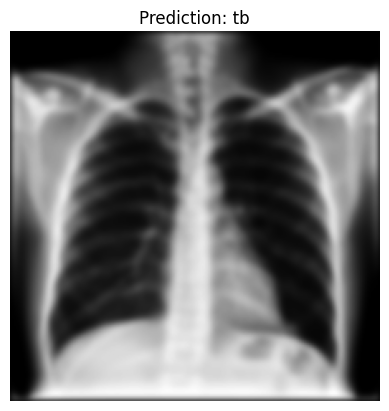

In [ ]:
pred_and_plot(xception,"/content/pre_val_bcet/test/tb/val_bcet_tb_image76.png",classes)


1/1 [==============================] - 0s 36ms/step


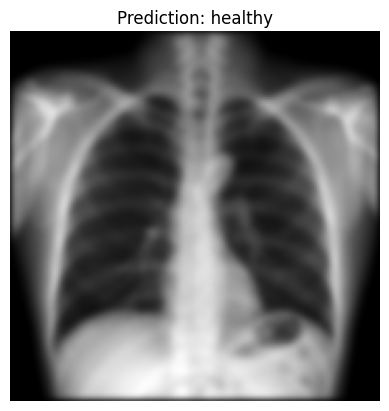

In [ ]:
pred_and_plot(xception,"/content/pre_val_bcet/test/health/val_bcet_image149.png",classes)


1/1 [==============================] - 0s 40ms/step


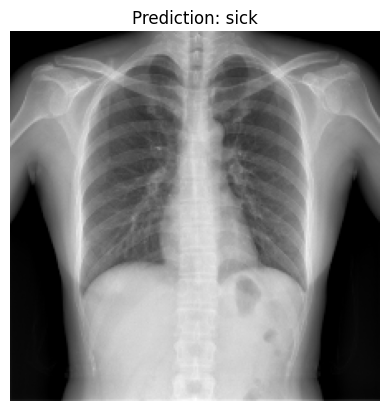

In [ ]:
pred_and_plot(xception,"/content/TBX11K/imgs/test/unknown_1854.png",classes)


1/1 [==============================] - 0s 136ms/step


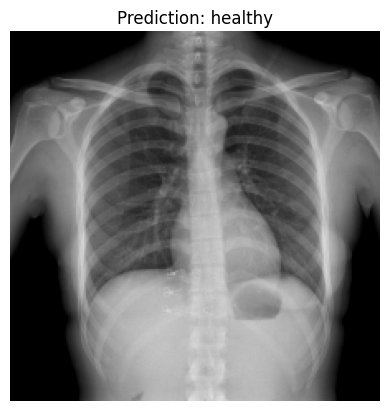

In [ ]:
pred_and_plot(xception,"/content/TBX11K/imgs/test/unknown_1873.png",classes)


1/1 [==============================] - 0s 42ms/step


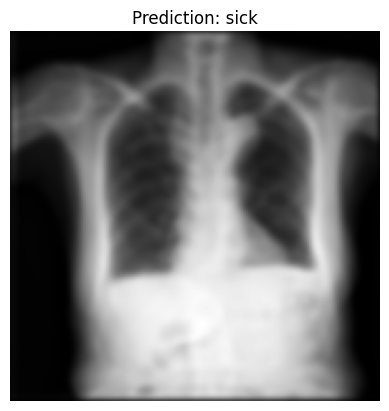

In [ ]:
'/content/TBX11K/imgs/sick/s0008.png'
pred_and_plot(xception,"/content/pre_val_bcet/test/sick/val_bcet_sick_image28.png",classes)


1/1 [==============================] - 0s 89ms/step


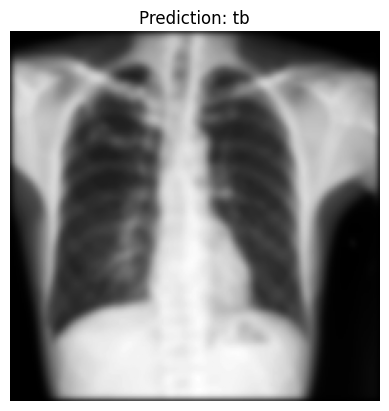

In [ ]:
'/content/TBX11K/imgs/sick/s0008.png'
pred_and_plot(xception,"/content/pre_val_bcet/test/tb/val_bcet_tb_image76.png",classes)


In [ ]:
 img=cv2.imread(file,1)
  smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
  bcet_image=bcet(smoothed_img)
  cv2.imwrite('/content/outbcet/tb/bcet_tb_image'+str(img_number)+".png",bcet_image)

In [ ]:
files="/content/TBX11K/imgs/test/unknown_1263.png"
img=cv2.imread(file,1)
smoothed_img=img_as_ubyte(gaussian(img,sigma=5, mode='constant',cval=0.0))
bcet_image=bcet(smoothed_img)
cv2.imwrite('resultunknown7'+".png",bcet_image)

#pred_and_plot(xception,"",classes)


<ipython-input-12-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


True

In [ ]:
pred_only(xception,"/content/TBX11K/imgs/test/unknown_1263.png",classes)


1/1 [==============================] - 0s 89ms/step


'healthy'

1/1 [==============================] - 0s 41ms/step


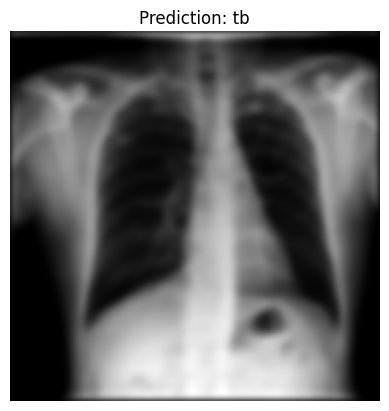

In [ ]:
pred_and_plot(xception,"/content/resultunknown.png",classes)


1/1 [==============================] - 0s 25ms/step


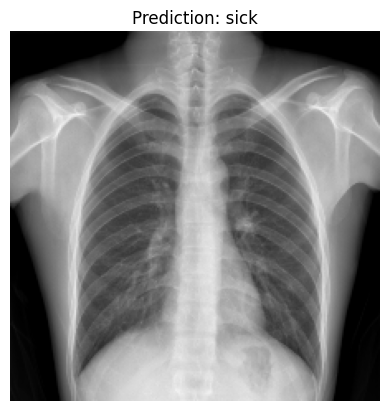

In [ ]:
pred_and_plot(xception,"/content/TBX11K/imgs/test/unknown_1031.png",classes)


In [ ]:
#/content/valbcet/sick/val_bcet_sick_image100.png
#/content/valbcet/sick/val_bcet_sick_image204.png
#/content/valbcet/tb/val_bcet_tb_image25.png
#val bcet 112


1/1 [==============================] - 0s 22ms/step


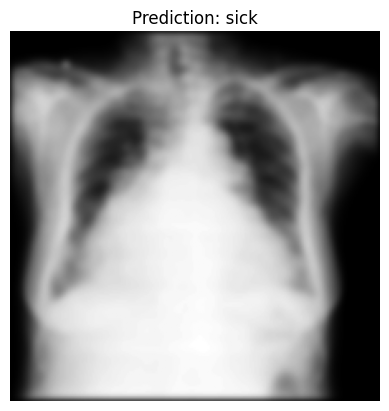

In [ ]:
pred_and_plot(xception,"/content/pre_val_bcet/val/sick/val_bcet_sick_image204.png",classes)


1/1 [==============================] - 0s 36ms/step


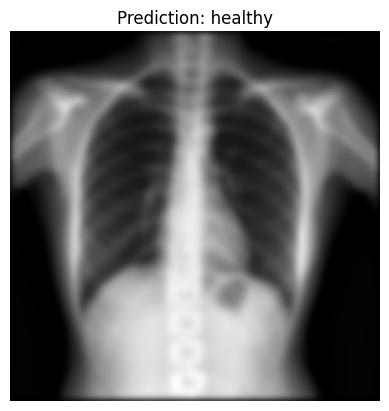

In [ ]:
pred_and_plot(xception,"/content/pre_val_bcet/train/health/val_bcet_image112.png",classes)


In [ ]:
pred_only(xception,'/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png',classes)

1/1 [==============================] - 0s 105ms/step


'tb'

# CSV FUNCTION

#

In [ ]:
path='/content/gamma-correction/train/health/*.*'
img_number=1
for file in glob.glob(path):


In [ ]:
df = pd.DataFrame(columns=('image', 'actual', 'predicted'))
df

Empty DataFrame
Columns: [image, actual, predicted]
Index: []

In [152]:
import os
#/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png
rpath='/content/pre_val_bcet/test/tb/*.*'
for i in glob.glob(rpath):
  for j in range(0,len(os.listdir('/content/pre_val_bcet/test/tb/'))):
    a=pred_only(xception,i,classes)
    df.loc[j]=i,'tb',a












1/1 [==============================] - 0s 29ms/step


In [ ]:
df

image actual predicted
0  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...     tb        tb
1  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...     tb        tb
2  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...     tb        tb
3  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...     tb        tb

In [153]:
final_df2 = pd.DataFrame(columns=('image', 'actual', 'predicted'))
final_df2

Empty DataFrame
Columns: [image, actual, predicted]
Index: []

In [154]:

way='/content/pre_val_bcet/test/tb/*.*'
for i in glob.glob(way):
  print(i)


/content/pre_val_bcet/test/tb/val_bcet_tb_image9.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image76.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image71.png


In [155]:
import re

def cleaner(way):
  clean_path = re.sub(r"\/\*.\*$", "", way)
  return clean_path


In [156]:

way='/content/pre_val_bcet/test/tb/*.*'
for i in glob.glob(way):
  print(i)

/content/pre_val_bcet/test/tb/val_bcet_tb_image9.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image76.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image71.png


In [158]:
way = "/content/pre_val_bcet/test/tb/*.*"

if "tb" in way:
  print("tb exists")
else:
  print("tb does not exist")
image_paths = glob.glob(way)
random_image = random.choice(image_paths)
random_image



tb exists


'/content/pre_val_bcet/test/tb/val_bcet_tb_image71.png'

In [159]:
rpaths=['/content/pre_val_bcet/test/tb/*.*','/content/pre_val_bcet/test/sick/*.*','/content/pre_val_bcet/test/health/*.*']
pathsss=random.choice(rpaths)
print(pathsss)
clean_path=cleaner(pathsss)
clean_path

/content/pre_val_bcet/test/health/*.*


'/content/pre_val_bcet/test/health'

In [178]:
import os
import random
#/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png
def predictor(rpath):
  for j in range(1,25):
    way=random.choice(rpath)
    if way==rpath[0]:
      actual='tb'
    elif way==rpath[1]:
      actual='sick'
    else:
      actual='healthy'
    clean_path=cleaner(way)
    image_paths = glob.glob(way)
    random_image = random.choice(image_paths)
    a=pred_only(xception,random_image,classes)
    final_df2.loc[j]=random_image,actual,a

    if actual != a:
      print(random_image)












In [ ]:
rpath=['/content/pre_val_bcet/test/tb/*.*','/content/pre_val_bcet/test/sick/*.*','/content/pre_val_bcet/test/health/*.*']

predictor(rpath)

1/1 [==============================] - 0s 25ms/step


In [ ]:
final_df2


image   actual predicted
0   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...  healthy        tb
1   /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
2   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
3   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
4   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick        tb
5   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
6   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
7   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
8   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick        tb
9   /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
10  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
11  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
12  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
13  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
14  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
15  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
16  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
17  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
18  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
19  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
20  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
21  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
22  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
23  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
24  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick

In [188]:
rpath=['/content/pre_val_bcet/test/tb/*.*','/content/pre_val_bcet/test/sick/*.*','/content/pre_val_bcet/test/health/*.*']

predictor(rpath)

1/1 [==============================] - 0s 24ms/step
/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png
1/1 [==============================] - 0s 29ms/step
/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png
1/1 [==============================] - 0s 24ms/step


In [184]:
/content/pre_val_bcet/test/tb/val_bcet_tb_image71.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png
/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png


original->tb gave sick

NameError: ignored

In [189]:
final_df2

image   actual predicted
1   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
2   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
3   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
4   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
5   /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
6   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
7   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
8   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
9   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
10  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
11  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick
12  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
13  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
14  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick
15  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
16  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
17  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
18  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
19  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
20  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
21  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
22  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb        tb
23  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
24  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick

In [172]:
a=final_df2.image.max_colwidth = 200
a

200

In [171]:
final_df2.image.max_colwidth=200

In [166]:
final_df2

image   actual predicted
1   /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
2   /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
3   /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
4   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
5   /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
6   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick
7   /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
8   /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick
9   /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
10  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick
11  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
12  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
13  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
14  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
15  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick
16  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
17  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick
18  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
19  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
20  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick
21  /content/pre_val_bcet/test/sick/val_bcet_sick_...     sick      sick
22  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
23  /content/pre_val_bcet/test/health/val_bcet_ima...  healthy   healthy
24  /content/pre_val_bcet/test/tb/val_bcet_tb_imag...       tb      sick

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('actual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('predicted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('actual')):
  _plot_series(series, series_name, i)
  fig.legend(title='actual', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('predicted')):
  _plot_series(series, series_name, i)
  fig.legend(title='predicted', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['predicted'].value_counts()
    for x_label, grp in _df_6.groupby('actual')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('actual')
_ = plt.ylabel('predicted')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['actual'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='actual', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['predicted'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='predicted', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-12-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


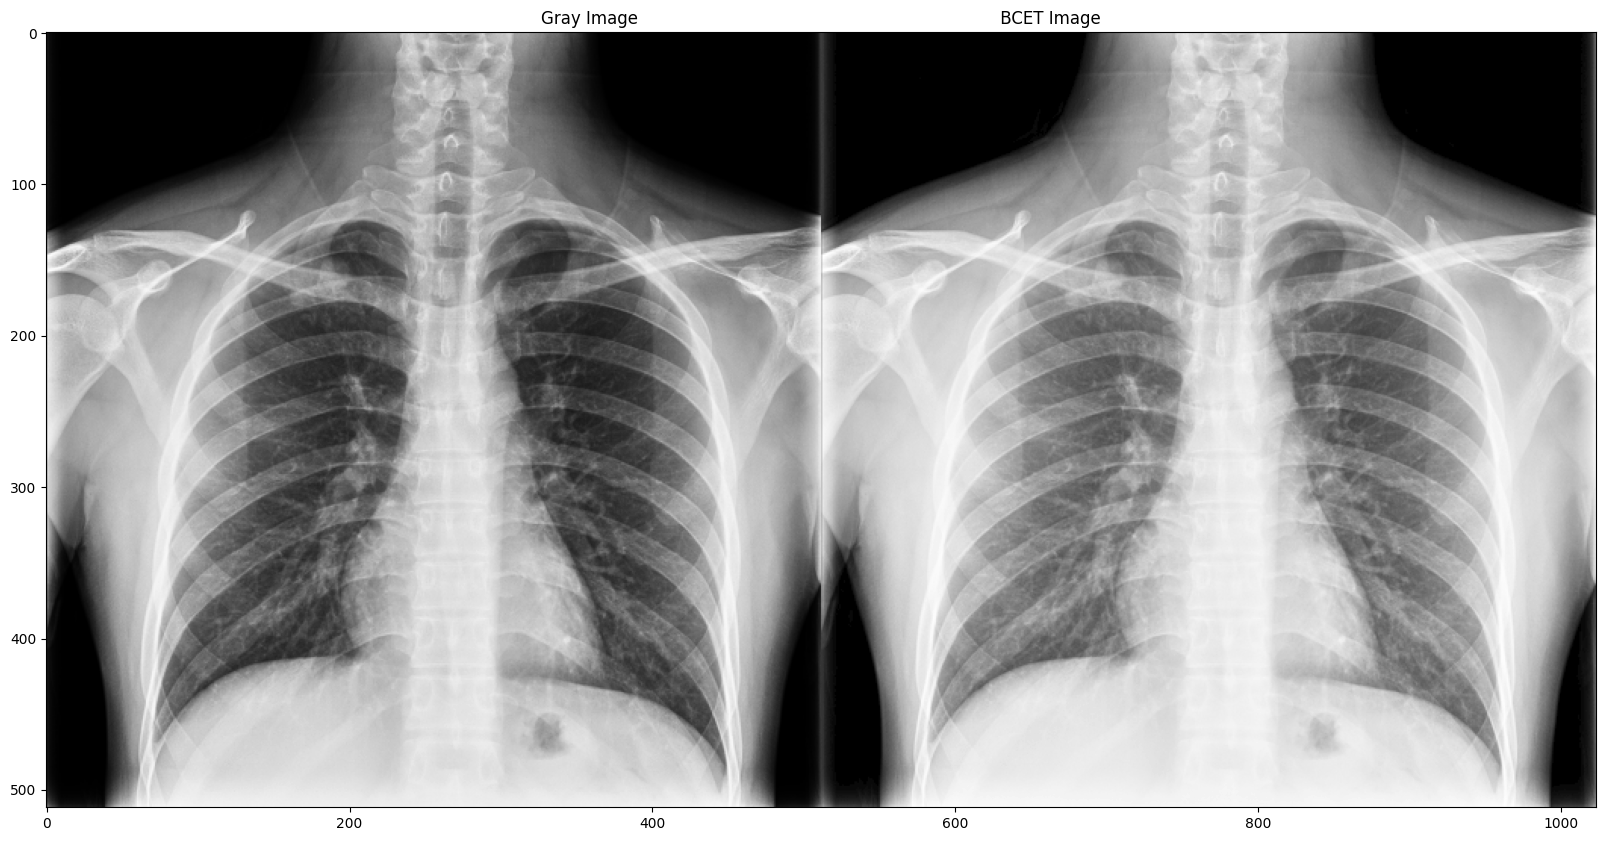

In [191]:
original=cv2.imread("/content/pre_val_bcet/test/tb/val_bcet_tb_image71.png")

gray_img = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)

bcet_img = bcet(gray_img)
plt.figure(figsize=(20,20))
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Converting to gray scale image from 3 channels to single channel

'''gamma correction'''


gray_img = gray_img/255.0
im_power_law_transformation = cv2.pow(gray_img, 0.6)
plt.imshow(np.hstack((gray_img, im_power_law_transformation)),cmap='gray')
plt.title('Gray Image                                                                     BCET Image')
plt.show()

<ipython-input-12-60b7afc909b3>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  bnum = Lmax * Lmax *(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin * Lmin *(Gmax-Gmean)


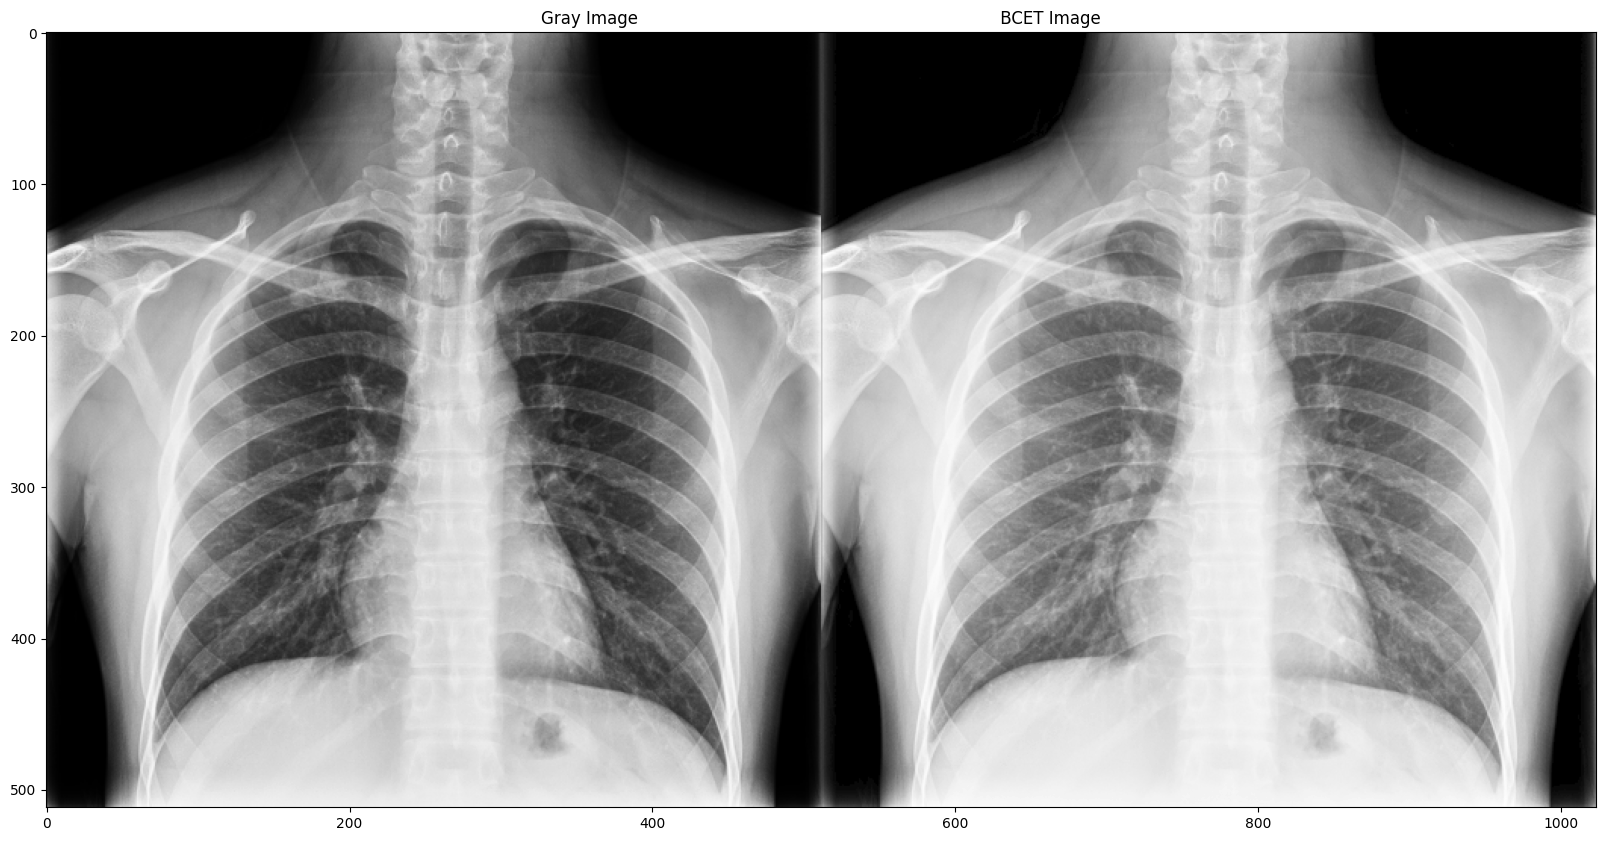

In [190]:
original=cv2.imread("/content/pre_val_bcet/test/tb/val_bcet_tb_image51.png")

gray_img = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)

bcet_img = bcet(gray_img)
plt.figure(figsize=(20,20))
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Converting to gray scale image from 3 channels to single channel

'''gamma correction'''


gray_img = gray_img/255.0
im_power_law_transformation = cv2.pow(gray_img, 0.6)
plt.imshow(np.hstack((gray_img, im_power_law_transformation)),cmap='gray')
plt.title('Gray Image                                                                     BCET Image')
plt.show()

In [ ]:
a=pred_only(xception,'/content/pre_val_bcet/train/health/val_bcet_image112.png'	,classes)
a

1/1 [==============================] - 0s 32ms/step


'healthy'

In [ ]:
final_df2.to_csv('final_results.csv')